# Processes & Materials

In [27]:
import pandas as pd 
import numpy as np 

### Helper Functions

In [29]:
def downcast_dtypes(df:pd.DataFrame) -> pd.DataFrame:
    """Downcasts the data types of the dataframe to the lowest type required."""
    # get the dtypes of the dataframe
    for col in df.select_dtypes('number'):
        df[col] = pd.to_numeric(df[col], downcast='integer')
        if df[col].dtype == 'float':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

## EDA

### Data Loading & Cleaning

In [30]:
## path to file 
FILE = 'data.csv'
## read the file
data = pd.read_csv(FILE)
## transpose, reset index and drop the index
data = data.T.reset_index().drop("index", axis=1).set_index(0).T

## clean the data 

## the column Cost/Energy: replace ? with 0 
data['Cost/Energy…?'] = data['Cost/Energy…?'].replace('?', 0)
## rename the column 'Cost/Energy…?' to 'Energy'
data.rename(columns={'Cost/Energy…?': 'Energy'}, inplace=True)
## get all columns except Energy and Processes
cols = [col for col in data.columns if col not in ['Energy', 'Processes']]
## convert the columns to numeric 
data[cols] = data[cols].apply(pd.to_numeric)


## some feedback from the data 
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")
## show the dtypes of the data
print("The data has the following dtypes:")
print(data.dtypes.value_counts()) ## the dtypes occupy a lot of memory 
usage_now = data.memory_usage(deep=True).sum()
print(f"The data occupies {data.memory_usage().sum()/1e9} GB of memory.\n")

## downcast the dtypes to the lowest type required
data = downcast_dtypes(data)
print(f"The data has the following dtypes after downcasting:")
print(data.dtypes.value_counts())
## show the amount of memory the data occupies
usage_after = data.memory_usage(deep=True).sum()
print(f"The data occupies {data.memory_usage().sum()/1e9} GB of memory.")
## show the percentage of reduced memory usage of the dataframe
print(f"\nThe data occupies {(usage_now-usage_after)/usage_now*100:.2f}% less memory than before.")
## save the dataframe to a csv file
data.to_csv("./low_mem_data.csv")

The data has 30 rows and 22 columns.
The data has the following dtypes:
int64     21
object     1
dtype: int64
The data occupies 5.52e-06 GB of memory.

The data has the following dtypes after downcasting:
int8      21
object     1
dtype: int64
The data occupies 1.11e-06 GB of memory.

The data occupies 55.26% less memory than before.


In [32]:
data

,Processes,M-001,M-002,M-003,M-004,M-005,M-006,M-007,M-008,M-009,...,M-012,M-013,M-014,M-015,M-016,M-017,M-018,M-019,M-020,Energy
1,P-001,-73,0,59,0,48,0,0,0,0,...,-60,0,0,-26,0,0,-9,-15,0,0
2,P-002,0,0,0,0,73,0,0,11,0,...,0,36,-33,33,-82,64,0,-38,-92,0
3,P-003,0,0,0,58,26,0,0,92,43,...,-42,34,-4,5,0,0,0,0,0,0
4,P-004,0,71,-28,0,-76,0,4,-12,0,...,0,-21,0,0,-28,0,18,0,0,0
5,P-005,0,-2,0,-71,37,0,0,19,16,...,98,-7,0,0,0,0,-91,22,4,0
6,P-006,0,-97,0,0,0,0,79,0,-11,...,0,8,0,16,0,0,0,20,22,0
7,P-007,87,0,0,0,0,4,22,60,69,...,-96,0,0,0,0,0,0,1,0,0
8,P-008,47,10,0,-28,6,58,0,-5,0,...,0,0,0,0,74,-71,0,18,-33,0
9,P-009,25,51,0,0,67,-5,-95,-34,0,...,80,0,0,0,-50,24,0,0,0,0
10,P-010,0,22,15,0,0,-15,0,64,0,...,-87,0,0,64,0,0,-16,0,-70,0


In [ ]:
import matplotlib.pyplot as plt
data.sum(axis=1).sort_values(ascending=False).plot(kind='bar',
                                                   rot=0,
                                                   figsize=(12,8),
                                                   title='Total Energy Consumption')
plt.show()

In [ ]:
df = data.copy(deep=True)
df['sum'] = df.sum(axis=1)
df.head()

In [ ]:
fig = px.bar_polar(df, r="sum", theta="Processes", color="sum",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                  )
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

## create a plotly figure with the data
sort_data = data.set_index('Processes').sum(axis=1).sort_values(ascending=False)

## create a plotly figure with the data
fig = px.bar(sort_data,
             hover_data=[sort_data.index,'value'],
             color='value',
             labels={
                     "value": "Energy",
                     "index": "Processes",
                 })
## remove the legend
fig.update_layout(showlegend=False,
                  xaxis = go.layout.XAxis(
                                        tickangle = 45),
                  title = {
                            'text': "Energy Consumption by Processes",
                            'y':0.92, # new
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top' # new
                            },
                  title_font_size=25,
                  )
## change the title 
fig.show()

In [ ]:
material_data = data.copy(deep=True)
dmat = pd.DataFrame(material_data.drop('Energy',axis=1).set_index('Processes').T.sum(axis=1))
dmat.columns = ['Material']
dmat.index.name = 'Processes'
dmat = dmat.sort_values(by='Material',ascending=False)

In [ ]:
## create a plotly figure with the data
fig = px.bar(dmat,
             color='value',
             labels={
                     "value": "Usage",
                     "index": "Processes",
                 })
## remove the legend
fig.update_layout(showlegend=False,
                  xaxis = go.layout.XAxis(
                                        tickangle = 45),
                  title = {
                            'text': "Consumption by Material",
                            'y':0.92, # new
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top' # new
                            },
                  title_font_size=25,
                  )
## axes names
fig.update_xaxes(title_text='Material ID')
## change the title 
fig.show()

## Graphs

In [4]:
## read the data 
df = pd.read_csv('./low_mem_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
## copy the dataframe 
dg = df.copy(deep=True)
## drop the processes and energy column 
dg.drop(['Processes', 'Energy'], axis=1, inplace=True)
## rename the columns to letters from A to Z
dg.columns = [chr(i) for i in range(65, 65+dg.shape[1])]
dg.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,-73,0,59,0,48,0,0,0,0,0,0,-60,0,0,-26,0,0,-9,-15,0
1,0,0,0,0,73,0,0,11,0,69,71,0,36,-33,33,-82,64,0,-38,-92
2,0,0,0,58,26,0,0,92,43,0,0,-42,34,-4,5,0,0,0,0,0
3,0,71,-28,0,-76,0,4,-12,0,0,-11,0,-21,0,0,-28,0,18,0,0
4,0,-2,0,-71,37,0,0,19,16,-43,-9,98,-7,0,0,0,0,-91,22,4


In [34]:
import networkx as nx
## convert the dataframe into a directed graph
def df2graph(df:pd.DataFrame) -> nx.DiGraph:
    """Converts a dataframe into a directed graph."""
    ## create a directed graph
    G = nx.DiGraph()
    ## add the nodes
    G.add_nodes_from(df.columns)
    ## add the edges
    for i in df.index:
        for j in df.columns:
            if df.loc[i,j] != 0:
                G.add_edge(i,j,weight=df.loc[i,j])
    return G

In [35]:
g = df2graph(dg)

In [38]:
## calculating basic statistics and information about the graph 
def calculate_graph_metrics(G:nx.DiGraph) -> dict:
    """Calculates basic statistics and information about the graph."""
    ## calculate the number of nodes and edges
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    ## calculate the average degree
    avg_degree = n_edges/n_nodes
    ## calculate the diameter
    #diameter = nx.diameter(G)
    ## calculate the clustering coefficient
    clustering_coeff = nx.average_clustering(G)
    ## calculate the average shortest path length
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    ## calculate the average distance between nodes
    avg_distance = nx.average_shortest_path_length(G)
    ## return the dictionary with all the metrics 
    d = {'n_nodes':n_nodes,
         "n_edges":n_edges,
         "avg_degree":avg_degree,
         #"diameter":diameter,
         "clustering_coeff":clustering_coeff,
         "avg_shortest_path_length":avg_shortest_path_length,
         "avg_distance":avg_distance}
    return d

In [43]:
## cluster the graph into cliques 
def find_cliques(G:nx.DiGraph) -> list:
    """Clusters the graph into cliques."""
    ## find the cliques
    cliques = list(nx.find_cliques(G))
    ## return the list of cliques
    return cliques

In [50]:
## convert the graph to a undirected graph
undir_g = nx.Graph(g)

## calculating metrics for a directed graph 
print("Metrics for a directed graph:")
d = calculate_graph_metrics(g)
for k,v in d.items():
    print(f"{k}: {v}")

## calculating metrics for an undirected graph 
print("\nMetrics for an undirected graph:")
dg = calculate_graph_metrics(undir_g)
for k,v in dg.items():
    print(f"{k}: {v}")
## print the diameter of the undir graph 
print(f"Diameter of the undirected graph: {nx.diameter(undir_g)}")


Metrics for a directed graph:
n_nodes: 50
n_edges: 297
avg_degree: 5.94
clustering_coeff: 0.0
avg_shortest_path_length: 0.12122448979591836
avg_distance: 0.12122448979591836

Metrics for an undirected graph:
n_nodes: 50
n_edges: 297
avg_degree: 5.94
clustering_coeff: 0.0
avg_shortest_path_length: 2.0048979591836735
avg_distance: 2.0048979591836735
Diameter of the undirected graph: 3


Number of cliques: 297


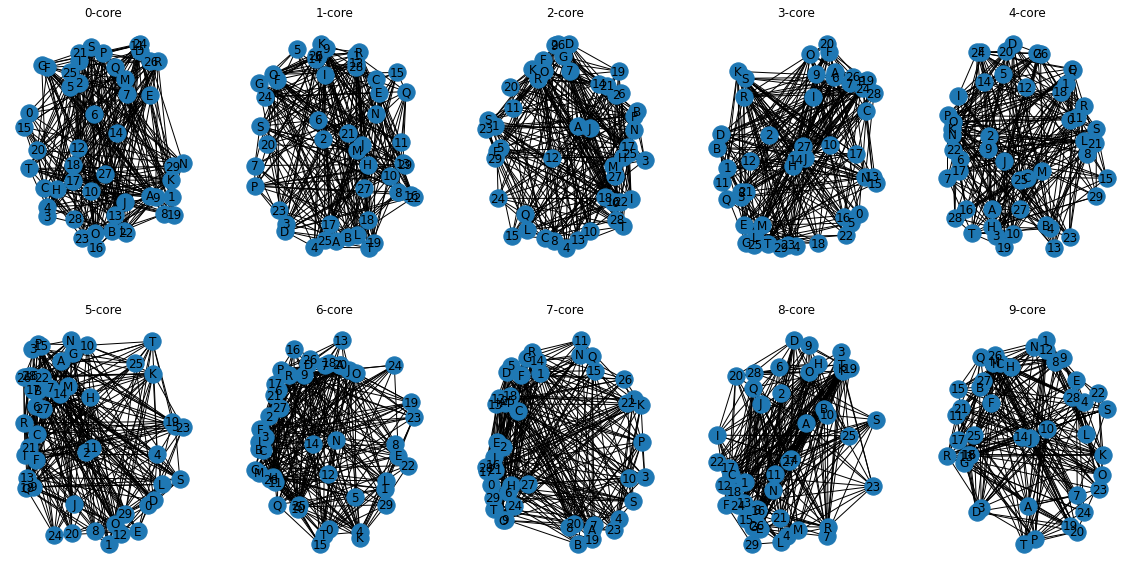

In [99]:
## find cliques for the undir_g
cliq = find_cliques(undir_g)
## print the number of cliques
print("Number of cliques:",len(cliq))
## make a subplot with 5 columns and 2 rows 
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = axs.ravel()
gs = []
for i in range(0, 10):
    g4 = nx.k_core(undir_g,i)
    ## make a subgraph of the 4-core
    gs.append(g4)
    h = undir_g.subgraph(g4.nodes())
    ## draw 
    nx.draw(h, with_labels=True,ax=axs[i])
    axs[i].set_title(f"{i}-core")
plt.show()

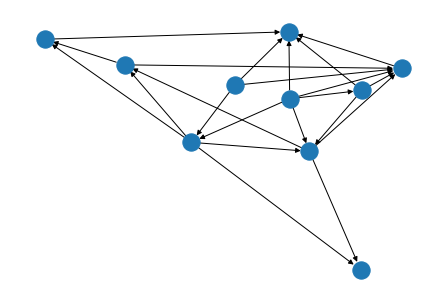

In [116]:
"""
The code below was generated by OpenAI's Copilot, it was tested to see whether it was able 
to generate a simple model for creating random graphs. 
The tool is very fun to use and it is very easy to use.

"""

## create a class for generating a random Barbarasi Graph 
class Barbarasi:
    def __init__(self, n:int, p:float):
        self.n = n
        self.p = p
    def generate(self) -> nx.Graph:
        ## create a directed graph
        g = nx.DiGraph()
        return g
    ## create a function to add edges to the graph
    def add_edges(self, g:nx.Graph) -> nx.Graph:
        ## add the nodes
        g.add_nodes_from(range(self.n))
        ## add the edges
        for i in range(self.n):
            for j in range(i+1,self.n):
                if np.random.random() < self.p:
                    g.add_edge(i,j)
        return g
    ## create a function to add nodes to the graph
    def add_nodes(self, g:nx.Graph) -> nx.Graph:
        ## add the nodes
        g.add_nodes_from(range(self.n))
        return g
    ## create a function to run the algorithm
    def run(self) -> nx.Graph:
        ## create a directed graph
        g = nx.DiGraph()
        ## add the nodes
        g = self.add_nodes(g)
        ## add the edges
        g = self.add_edges(g)
        return g
## run it 
g = Barbarasi(10,0.5).run()
## add a random layout to the graph 
nx.draw(g)

In [133]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("Rajaram1996/FacialEmoRecog")
model = AutoModelForImageClassification.from_pretrained("Rajaram1996/FacialEmoRecog")

Downloading: 100%|██████████| 228/228 [00:00<00:00, 71.3kB/s]
Downloading: 100%|██████████| 327M/327M [00:50<00:00, 6.80MB/s] 


In [145]:
## load an image test.jpg
img_path = "./test3.jpeg"
img = plt.imread(img_path, format="jpeg")

## pass the image to the extractor 
inputs = extractor(img, return_tensors='pt')
## pass the image to the model
with torch.no_grad():
    logits = model(**inputs).logits
## get predictions
y_preds = [x.argmax(dim=-1).item() for x in logits]
## function to return the label 
def return_label(y_preds:list) -> str:
    return model.config.id2label[y_preds[0]]
print(return_label(y_preds))

sadness


In [141]:
## pass the logits to get probabilities
probas = [x.softmax(dim=-1) for x in logits]
probas

[tensor([0.1015, 0.1085, 0.1016, 0.0919, 0.3332, 0.0904, 0.0966, 0.0763])]

## Plotting the graph

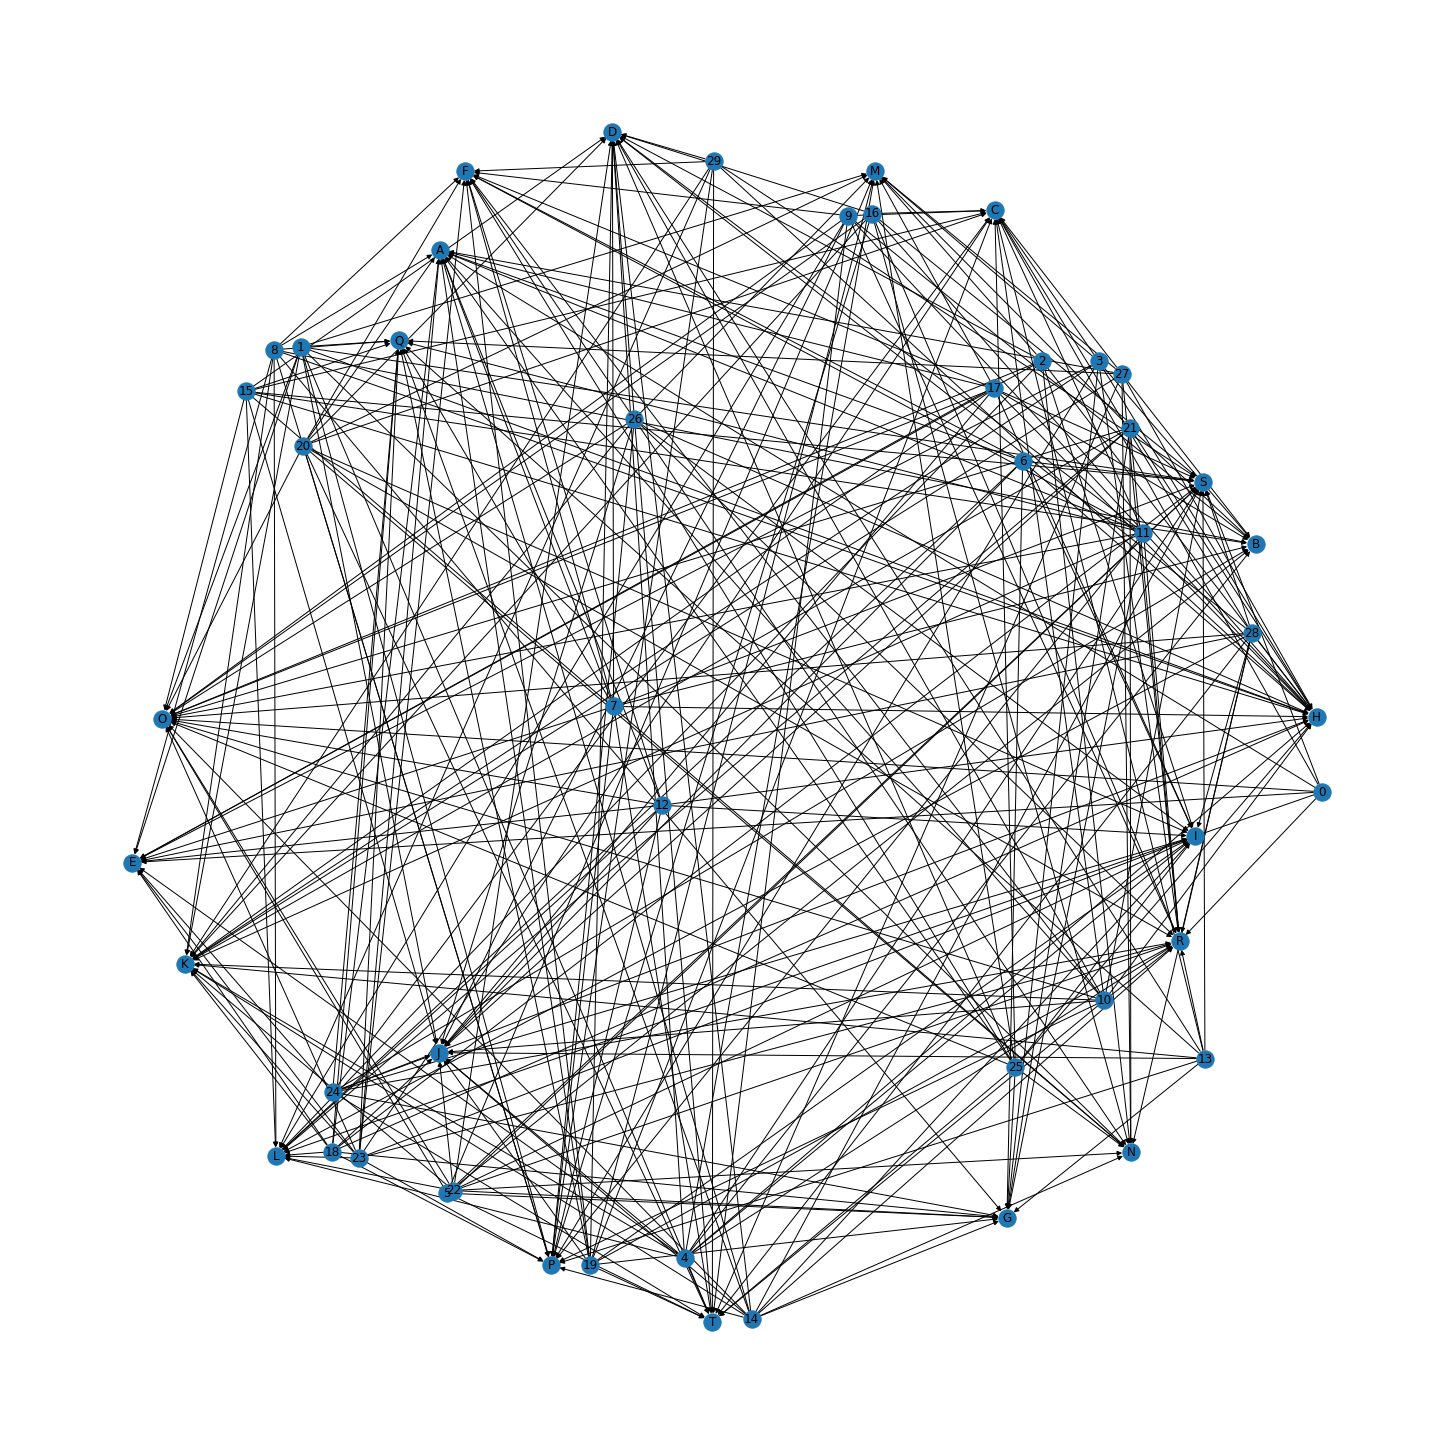

In [26]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,20)) 
nx.draw(g, with_labels=True)
plt.show()

In [147]:
#add a column for a dataframe with some position


AttributeError: 'float' object has no attribute 'argmax'